# **Elliptic++ Transactions Dataset**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---



## [SETUP] Import libraries and csv files 

Download dataset from: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_features.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_classes.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_edgelist.csv ./

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math

!pip install -U ipython 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 

import xgboost as xgb

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=138c7b7afc731dc3a39e6bd4e82b7a9fa2f965be699cbe7c19820bc09cf8bfa4
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

## Transactions Dataset Overview


---

This section loads the 3 csv files (txs_features, txs_classes, txs_edgelist) and provides a quick overview of the dataset structure and features.

Load saved transactions dataset csv files:

In [ ]:
print("\nTransaction features: \n")
df_txs_features = pd.read_csv("txs_features.csv")
df_txs_features

print("\nTransaction classes: \n")
df_txs_classes = pd.read_csv("txs_classes.csv")
df_txs_classes

print("\nTransaction-Transaction edgelist: \n")
df_txs_edgelist = pd.read_csv("txs_edgelist.csv")
df_txs_edgelist


Transaction features: 



,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Transaction classes: 



,txId,class
0,3321,3
1,11108,3
2,51816,3
3,68869,2
4,89273,2
...,...,...
203764,158304003,3
203765,158303998,3
203766,158303966,3
203767,161526077,3



Transaction-Transaction edgelist: 



,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


Data structure for an example transaction (txId = 272145560):

In [ ]:
print("\ntxs_features.csv for txId = 272145560\n")
df_txs_features[df_txs_features['txId']==272145560]

print("\ntxs_classes.csv for txId = 272145560\n")
df_txs_classes[df_txs_classes['txId']==272145560]

print("\ntxs_edgelist.csv for txId = 272145560\n")
df_txs_edgelist[(df_txs_edgelist['txId1']==272145560) | (df_txs_edgelist['txId2']==272145560)]


txs_features.csv for txId=272145560



,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
105573,272145560,24,-0.155493,-0.107012,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.145749,...,2.7732,2.7732,2.7732,2.7732,2.7732,0.001917,2.770883,1.3864,1.3864,2.7728



txs_classes.csv for txId=272145560



,txId,class
105573,272145560,1



txs_edgelist.csv for txId=272145560



,txId1,txId2
123072,272145560,296926618
123272,272145560,272145556
125873,299475624,272145560



Transaction features --- 94 local features, 72 aggregate features, 17 augmented features:


In [ ]:
list(df_txs_features.columns)

['txId',
 'Time step',
 'class',
 'Local_feature_1',
 'Local_feature_2',
 'Local_feature_3',
 'Local_feature_4',
 'Local_feature_5',
 'Local_feature_6',
 'Local_feature_7',
 'Local_feature_8',
 'Local_feature_9',
 'Local_feature_10',
 'Local_feature_11',
 'Local_feature_12',
 'Local_feature_13',
 'Local_feature_14',
 'Local_feature_15',
 'Local_feature_16',
 'Local_feature_17',
 'Local_feature_18',
 'Local_feature_19',
 'Local_feature_20',
 'Local_feature_21',
 'Local_feature_22',
 'Local_feature_23',
 'Local_feature_24',
 'Local_feature_25',
 'Local_feature_26',
 'Local_feature_27',
 'Local_feature_28',
 'Local_feature_29',
 'Local_feature_30',
 'Local_feature_31',
 'Local_feature_32',
 'Local_feature_33',
 'Local_feature_34',
 'Local_feature_35',
 'Local_feature_36',
 'Local_feature_37',
 'Local_feature_38',
 'Local_feature_39',
 'Local_feature_40',
 'Local_feature_41',
 'Local_feature_42',
 'Local_feature_43',
 'Local_feature_44',
 'Local_feature_45',
 'Local_feature_46',
 'Local_fe

## Feature Analysis


---

This section analyzes features using scikit learn feature importances, permutation feature importance, and drop column feature importance.

RF.feature_importances_:

In [ ]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": cRF.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)
imp_df_sorted

,Feature,Imp
52,Local_feature_53,0.057675
54,Local_feature_55,0.041891
169,size,0.041139
46,Local_feature_47,0.035689
75,Local_feature_76,0.034637
...,...,...
37,Local_feature_38,0.000128
38,Local_feature_39,0.000124
6,Local_feature_7,0.000080
69,Local_feature_70,0.000067


Top 20 and Bottom 20 features:

<Figure size 720x720 with 0 Axes>

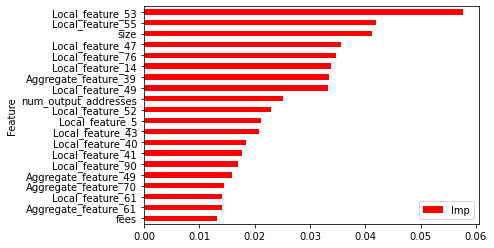

In [ ]:
# top 20 features
plt.figure(figsize=(10,10))
imp_df_sorted[:20].iloc[::-1].plot(kind='barh',y='Imp',x='Feature',color='r')

<Figure size 720x720 with 0 Axes>

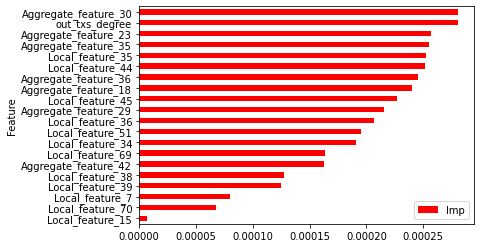

In [ ]:
# bottom 20 features
plt.figure(figsize=(10,10))
imp_df_sorted[162:].iloc[::-1].plot(kind='barh',y='Imp',x='Feature',color='r')

Permutation feature importance:

In [ ]:
perm = PermutationImportance(cRF, random_state=1).fit(X_train.values, y_train.values)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.0276 ± 0.0013,Local_feature_53
0.0108 ± 0.0003,Local_feature_55
0.0059 ± 0.0001,Local_feature_81
0.0054 ± 0.0004,Local_feature_2
0.0028 ± 0.0002,Local_feature_76
0.0027 ± 0.0003,Aggregate_feature_70
0.0023 ± 0.0002,Local_feature_43
0.0019 ± 0.0002,Local_feature_14
0.0018 ± 0.0002,Local_feature_47
0.0018 ± 0.0002,Aggregate_feature_67


Drop column feature importance:

In [ ]:
model = cRF
X_train = X_train
y_train = y_train
random_state = 42

# clone the model to have the exact same specification as the one initially trained
model_clone = clone(model)
# set random_state for comparability
model_clone.random_state = random_state
# training and scoring the benchmark model
model_clone.fit(X_train.values, y_train.values)
benchmark_score = model_clone.score(X_train.values, y_train.values)
# list for storing feature importances
importances = []

# iterating over all columns and storing feature importance (difference between benchmark and new model)
for col in X_train.columns:
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(X_train.drop(col, axis = 1).values, y_train.values)
    drop_col_score = model_clone.score(X_train.drop(col, axis = 1).values, y_train.values)
    importances.append(benchmark_score - drop_col_score)

importances_df = pd.DataFrame (X_train.columns, importances)
get_drop_importance = importances_df

In [ ]:
get_drop_importance.reset_index(inplace=True)
get_drop_importance = get_drop_importance.rename(columns = {'index':'Imp', 0:'Feature'})
get_drop_importance = get_drop_importance.sort_values('Imp', ascending=False)
get_drop_importance

,Imp,Feature
86,0.000034,Local_feature_87
43,0.000034,Local_feature_44
28,0.000034,Local_feature_29
85,0.000034,Local_feature_86
33,0.000034,Local_feature_34
...,...,...
73,-0.000034,Local_feature_74
71,-0.000034,Local_feature_72
70,-0.000034,Local_feature_71
69,-0.000034,Local_feature_70


## RF Trees Analysis


---

This section explores the voting of all 50 RF trees for transactions in the testing set.

Analysis on RF tree voting can show the effect of increased classification accuracy after selecting important features. Refer to the paper to see the before and after effects of selecting features on the RF tree voting (Figure 12a).

Visualizing the features making up each of the 50 RF trees (there are many trees as we don't set a limit of number of features per tree, but for easier analysis the number of features per tree can be limited):

In [ ]:
n=0
while n < 50:
    classes = ['0','1']
    fig = plt.figure(figsize=(50, 50))
    plot_tree(cRF.estimators_[n], class_names=classes, filled=True, impurity=True, rounded=True)
    n+=1

Look at individual RF tree votes for a transaction. Change the "sample_id" below for the index of the transaction in the testing set:

In [ ]:
estimator = cRF

n_nodes_ = [t.tree_.node_count for t in estimator.estimators_]
children_left_ = [t.tree_.children_left for t in estimator.estimators_]
children_right_ = [t.tree_.children_right for t in estimator.estimators_]
feature_ = [t.tree_.feature for t in estimator.estimators_]
threshold_ = [t.tree_.threshold for t in estimator.estimators_]


def explore_tree(estimator, n_nodes, children_left,children_right, feature,threshold,
                suffix='', print_tree= False, sample_id=0, feature_names=None):

    if not feature_names:
        feature_names = feature

    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)

    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.

    node_indicator = estimator.decision_path(X_test.values)

    # Similarly, we can also have the leaves ids reached by each sample.

    leave_id = estimator.apply(X_test.values)

    # Now, it's possible to get the tests that were used to predict a sample or
    # a group of samples. First, let's make it for the sample.

    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    for node_id in node_index:
        tabulation = ""

        if (X_test.values[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

    print("%sPrediction for sample %d: %s"%(tabulation,
                                          sample_id,
                                          estimator.predict(X_test.values)[sample_id]))

    # For a group of samples, we have the following common node.
    sample_ids = [sample_id, 1]
    common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                    len(sample_ids))

    common_node_id = np.arange(n_nodes)[common_nodes]

    for sample_id_ in sample_ids:
        print("Prediction for sample %d: %s"%(sample_id_,
                                          estimator.predict(X_test.values)[sample_id_]))
        
for i,e in enumerate(estimator.estimators_):

    print("Tree %d\n"%i)
    explore_tree(estimator.estimators_[i],n_nodes_[i],children_left_[i],
                 children_right_[i], feature_[i],threshold_[i],
                suffix=i, sample_id=11983, feature_names=list(df_features.columns)[2:])
    print('\n'*2)

Tree 0

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 1

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 2

Prediction for sample 11983: 1.0
Prediction for sample 11983: 1.0
Prediction for sample 1: 0.0



Tree 3

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 4

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 5

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 6

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 7

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 8

Prediction for sample 11983: 0.0
Prediction for sample 11983: 0.0
Prediction for sample 1: 0.0



Tree 9

Prediction for sample 11983: 0.0
Predi

# **Acknowledgements**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---

